In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import the data set
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## EXPLORING THE DATA

In [4]:
#viewing data info
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
#dropping null entries
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [4]:
#plitting the data into training and testing data
from sklearn.model_selection import train_test_split

x = data.drop(["median_house_value"], axis=1) #parameters to evaluate.
y = data["median_house_value"] #resulting ans from the parameters.

In [5]:
#the data is being split here. 20% data we have reserved for testing the model.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
#joining the training data into a single data set.
train_data = x_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6411,-118.02,34.12,36.0,1471.0,246.0,751.0,230.0,5.4555,INLAND,395100.0
18941,-122.07,38.27,8.0,6761.0,1234.0,3237.0,1177.0,4.3586,INLAND,173400.0
7088,-118.00,33.93,35.0,802.0,153.0,445.0,150.0,5.0077,<1H OCEAN,185000.0
3453,-118.42,34.30,29.0,3334.0,712.0,2919.0,718.0,3.6548,<1H OCEAN,180300.0
17316,-120.20,34.63,14.0,2647.0,515.0,1487.0,488.0,4.4519,NEAR OCEAN,227900.0
...,...,...,...,...,...,...,...,...,...,...
5697,-118.26,34.24,35.0,1666.0,280.0,788.0,273.0,6.6277,<1H OCEAN,344400.0
11846,-120.57,39.78,15.0,1291.0,283.0,582.0,242.0,2.1216,INLAND,102000.0
578,-122.06,37.71,36.0,3541.0,570.0,1478.0,529.0,4.6350,NEAR BAY,248600.0
20487,-118.67,34.30,5.0,6123.0,825.0,2440.0,736.0,7.9013,<1H OCEAN,393000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

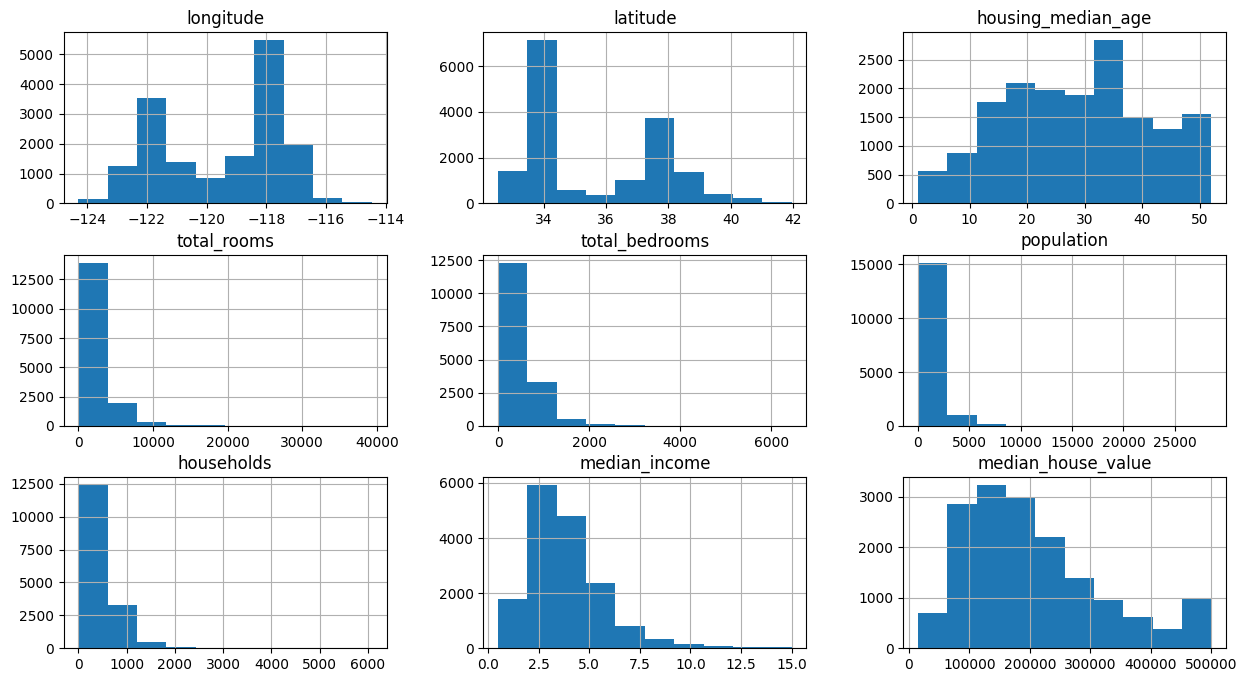

In [7]:
#plotting the distribution of data using histrogram.
train_data.hist(figsize=(15, 8))

<Axes: >

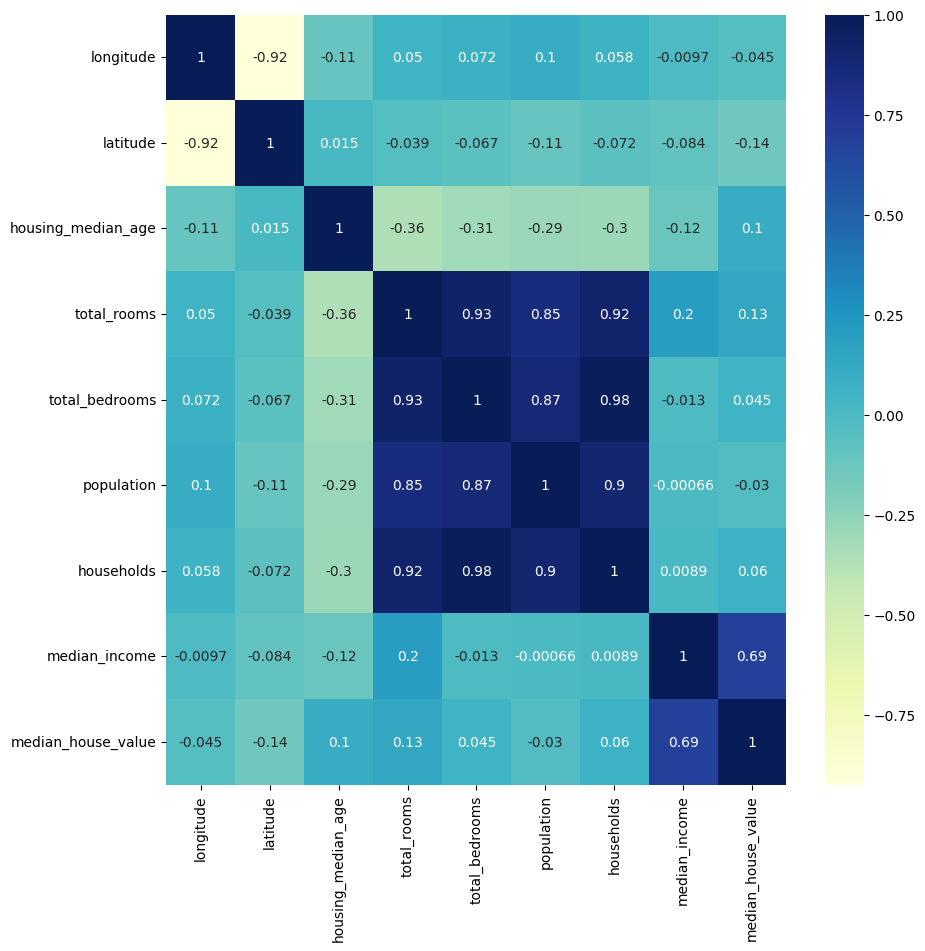

In [12]:
#plotting heatmap to see the corrolation between the different features
plt.figure(figsize=(10, 10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

## DATA PREPROCESSING

In [8]:
#fixing the skewed values in the histogram by taking log of those values
train_data["total_bedrooms"] = np.log(train_data['total_bedrooms'] + 1)
train_data["total_rooms"] = np.log(train_data['total_rooms'] + 1)
train_data["population"] = np.log(train_data['population'] + 1)
train_data["households"] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

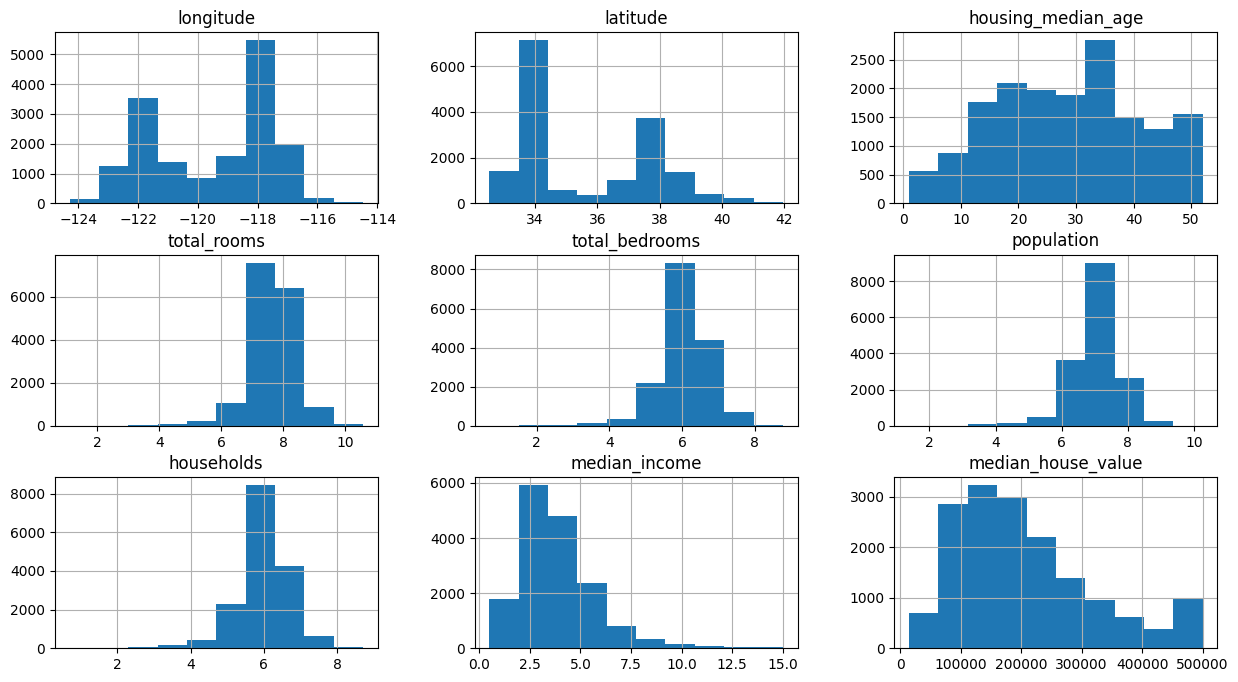

In [9]:
train_data.hist(figsize=(15, 8))

In [15]:
#want to use ocean count beacuse it is usefull feature so will convert it into numerical values
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7233
INLAND        5152
NEAR OCEAN    2103
NEAR BAY      1854
ISLAND           4
Name: count, dtype: int64

In [10]:
#converting the above categories in seperate features with binary values
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity))

In [11]:
train_data = train_data.drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14580,-117.19,32.82,35.0,6.980076,5.198497,6.093570,5.159055,5.2530,204000.0,False,False,False,False,True
9038,-118.09,34.74,34.0,7.105786,5.655992,6.682109,5.517453,2.4348,104800.0,False,True,False,False,False
17162,-122.20,37.35,17.0,8.037866,6.093570,7.068172,6.052089,13.2986,500001.0,False,False,False,True,False
2963,-119.05,35.33,18.0,9.449987,7.895808,8.855093,7.845024,2.9438,87200.0,False,True,False,False,False
7044,-118.04,33.95,35.0,7.573531,5.880533,7.113142,5.886104,5.2162,171900.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10079,-120.25,39.34,9.0,7.915713,6.320768,5.686975,4.709530,3.1842,162500.0,False,True,False,False,False
16964,-122.31,37.53,41.0,7.383368,5.598422,6.517671,5.590987,4.6125,361700.0,False,False,False,False,True
8186,-118.10,33.79,36.0,8.119696,6.391917,7.328437,6.338594,5.1805,249400.0,True,False,False,False,False
14001,-117.29,34.57,22.0,6.961296,5.480639,6.061457,5.480639,1.2548,68300.0,False,True,False,False,False


<Axes: >

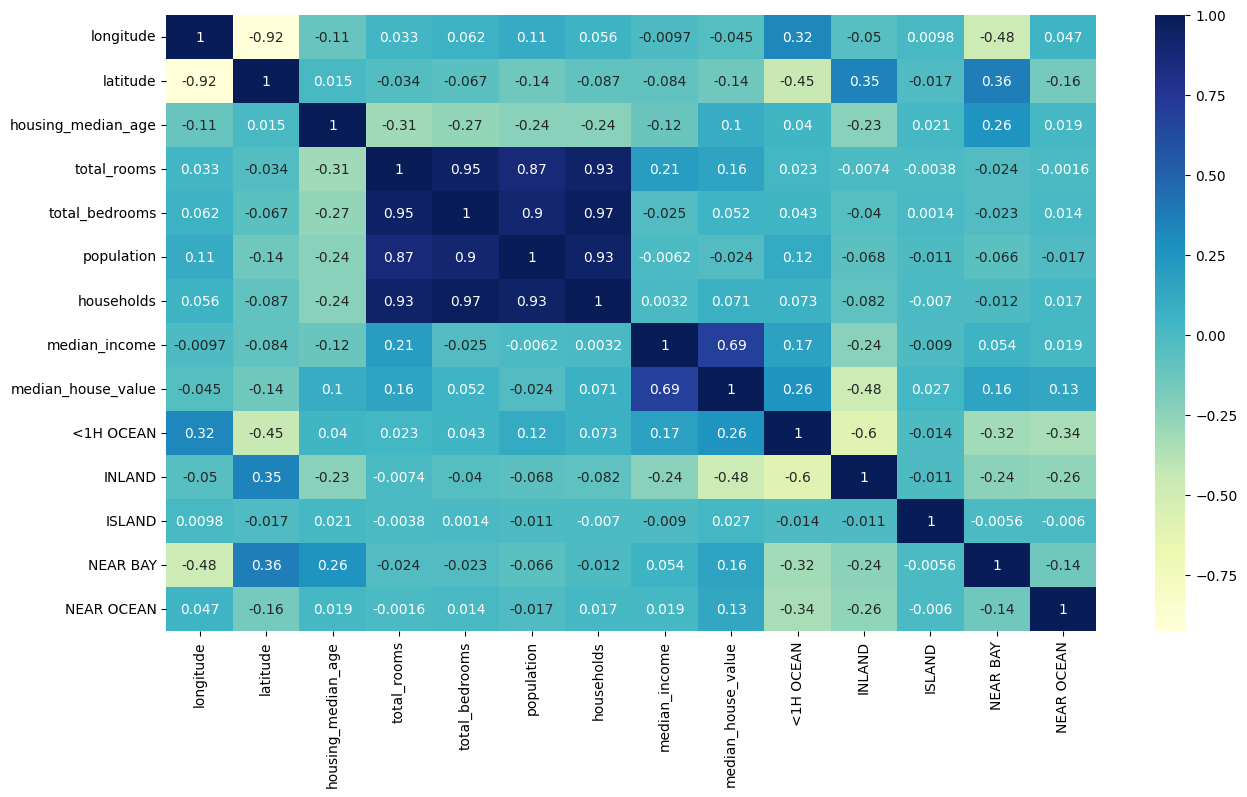

In [18]:
#checking the corollation again
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

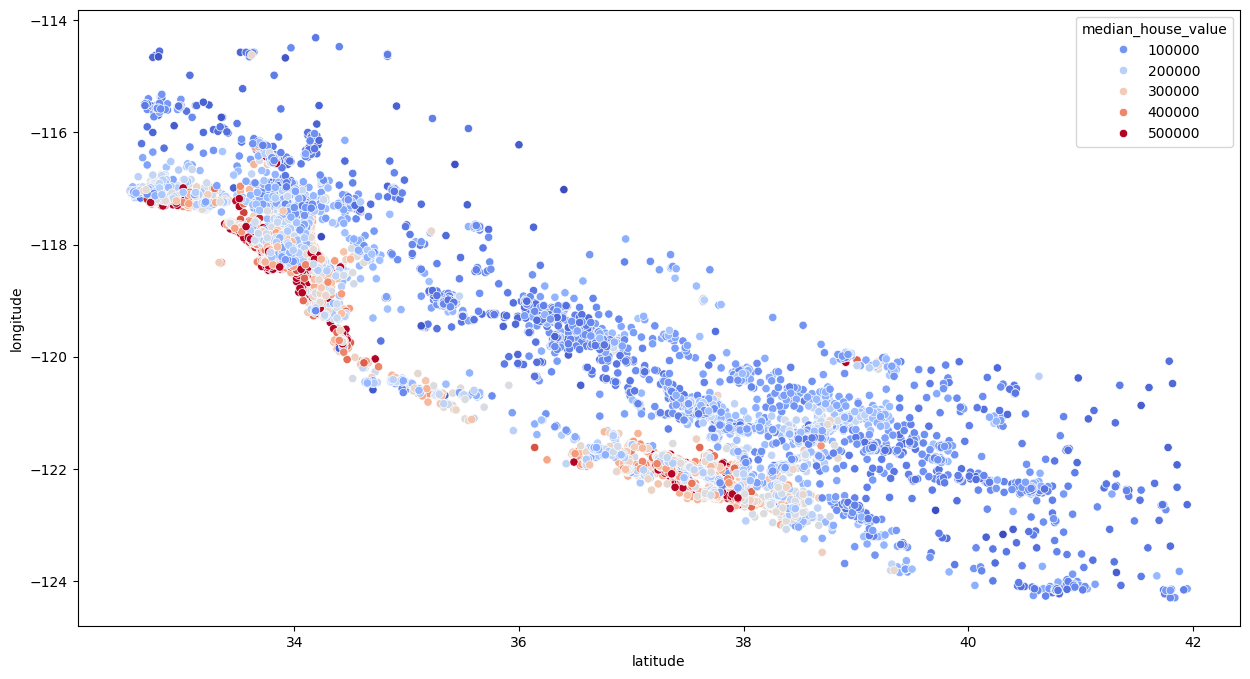

In [19]:
#visualizing the relationship of coordinates with median_house_value
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

## FEATURE ENGINEERING

In [12]:
#creating features that we think might be interesting and may affect median_house_value
train_data['bedroom_ratio'] = train_data["total_bedrooms"] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

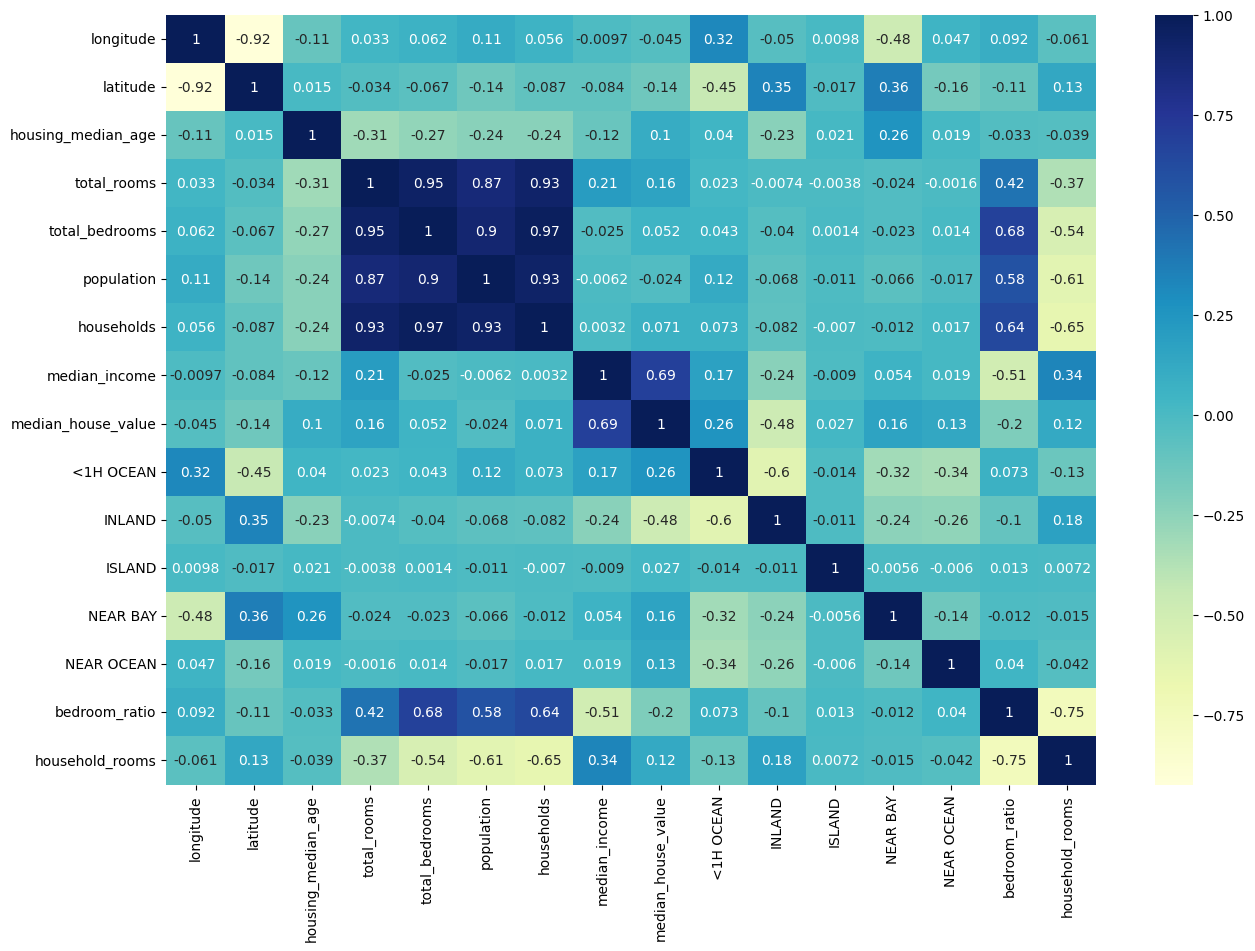

In [21]:
#checking the corollation of the new features with the target value
plt.figure(figsize=(15, 10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

## TRAINING A MODEL USING LINEAR REGRESSION

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#splitting data into x and y again because we have added new features. so we also need to take them into account.
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [14]:
#doing all the changes we did with the training data, we will do with the testing data.
test_data = x_test.join(y_test)

test_data["total_bedrooms"] = np.log(test_data['total_bedrooms'] + 1)
test_data["total_rooms"] = np.log(test_data['total_rooms'] + 1)
test_data["population"] = np.log(test_data['population'] + 1)
test_data["households"] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity))
test_data = test_data.drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data["total_bedrooms"] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

# test_data.insert(11, 'ISLAND', False) #inserting this column because in the testing data, no house is on island so hence we have to add it.

x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [15]:
x_test_s = scaler.transform(x_test)

In [16]:
reg.score(x_test_s, y_test)

0.667871396747058

## TRAINING A MODEL USING RANDOM FOREST

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [28]:
forest.score(x_test_s, y_test)

0.8256372496289379

In [30]:
#now configuring hyper parameters
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [3, 10, 30],
    'max_features': [2, 4, 6, 8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(x_train_s, y_train)

c:\UNI\programming practice\python\house prediction\env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
best_forest = grid_search.best_estimator_

In [33]:
best_forest.score(x_test_s, y_test)

0.8235363942470864